In [42]:
from sklearn.preprocessing import StandardScaler # for standarizin the data
import numpy as np # for matrix math
import matplotlib.pyplot as plt # for plotting
import matplotlib.patches as mpatches # for legends
import pandas as pd # importing data
from tensorflow.examples.tutorials.mnist import input_data # importing more data

%matplotlib notebook


# Functions for PCA

## Steps for PCA
1. Standardize Data (not nescessary, but helpful)
2. Compute convariance matrix 
3. Calculate Eigenvectors of covariance matrix
4. Use Eigenvectors to compute projection matrix
5. Multiply the inputs by the projection matrix get the the result
6. Return the result and projection matrix

In [1]:
# function for calculating PCA
# X is the dataset as a matrix. Rows represent variables
# k is the output dimensionality
# should_print refers to whether the results after each step of calculation should be outputted
# Returns Y, matrix of each variable in the output space
# Return projection_mat, the projection matrix which new variables should be multiplied by to transform them into feature space
def PCA(X, k, should_print=True):
    # Standardize the Data!
    X_std = StandardScaler().fit_transform(X)
    if(should_print):
        print("Standardized X: \n", X_std[:10, :])
    
    # We could have just as easily said cov_mat = np.cov(X_std.T)
    mean_vec = np.mean(X_std, axis=0)
    cov_mat = (X_std - mean_vec).T.dot(X_std - mean_vec) / (X_std.shape[0]-1)
    if(should_print):
        print("Covariance Matrix: \n", cov_mat)
    
    # now, get th eigenvectors and eigenvalues of the covariance matrix
    w,v = np.linalg.eig(cov_mat)
    if(should_print):
        print("Eigenvalues: ", w)
        print("Normalized Eigenvectors: \n", v)

    
    # We don't need to sort the eigenvalues because np.ligalg.eig already does that for us!
    # now, lets construct the projection matrix. This will take our original data and reduce its dimensionality
    projection_mat = v[:, :k]
    if(should_print):
        print("Projection Matrix: \n", projection_mat)
    
    # use the projection matrix to get the feature space data points
    Y = X_std.dot(projection_mat)
    return Y, projection_mat

In [23]:
# A helper function to plot the outputs of PCA in 2D
# Y is the output form PCA. The 2D positions of each variable
# y is the labels. These will be used for coloring the dataset
# classes is an array of possible classes. These will also be used for coloring. 
def plot_PCA2D(Y, y, classes, cmap_name='jet', marker=','):
    cs = []
    cmap = plt.get_cmap(cmap_name)
    
    labels_patches = []

    for i, c in enumerate(classes):
        indicies = np.where(y==c)
        vals = Y[indicies]
        plt.scatter(vals[:, 0], vals[:, 1], marker=marker, color=cmap(i/len(classes)))
        patch = mpatches.Patch(color=cmap(i/len(classes)), label=classes[i])
        labels_patches.append(patch)

    plt.legend(labels_patches, classes, loc=2) 
    plt.show()

# Iris Dataset

In [47]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
d = 4

print("Dataframe: ", df.tail())

X = df.ix[:, 0:d].values
y = df.ix[:, d].values

print("X: \n", X[:10, :])
print("y: \n", y[:10])

Dataframe:       sepal_len  sepal_wid  petal_len  petal_wid           class
145        6.7        3.0        5.2        2.3  Iris-virginica
146        6.3        2.5        5.0        1.9  Iris-virginica
147        6.5        3.0        5.2        2.0  Iris-virginica
148        6.2        3.4        5.4        2.3  Iris-virginica
149        5.9        3.0        5.1        1.8  Iris-virginica
X: 
 [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
y: 
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


Standardized X: 
 [[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]
Covariance Matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
Eigenvalues:  [ 2.93035378  0.92740362  0.14834223  0.02074601]
Normalized Eigenvectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 

<IPython.core.display.Javascript object>


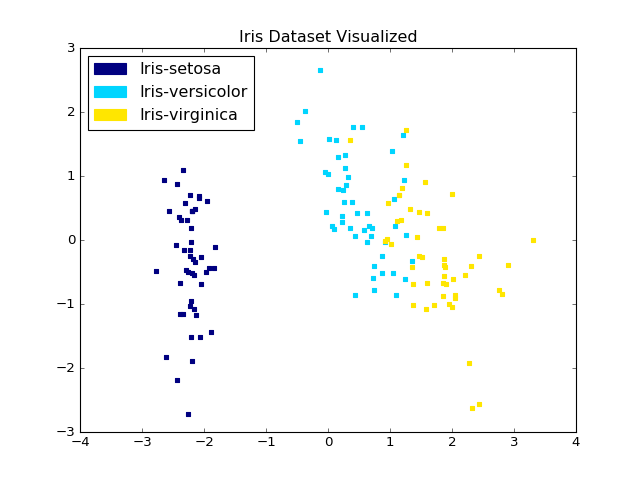

In [48]:
Y, proj_mat = PCA(X, 2, should_print=True)
plot_PCA2D(classes=classes, Y=Y, y=y, cmap_name='jet')
plt.title("Iris Dataset Visualized")

In [49]:
plt.close() # close the interactive version of the last plot, so the next one can be interative!

# MNIST Dataset

In [43]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

d = 784
classes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 0]
X = np.matrix(mnist.validation.images)
y = np.array(mnist.validation.labels)

print("X: \n", X[:10, :])
print("y: \n", y[:10])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
X: 
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
y: 
 [5 0 4 1 9 2 1 3 1 4]


In [44]:
Y, proj_mat = PCA(X, 2, should_print=False)


<IPython.core.display.Javascript object>


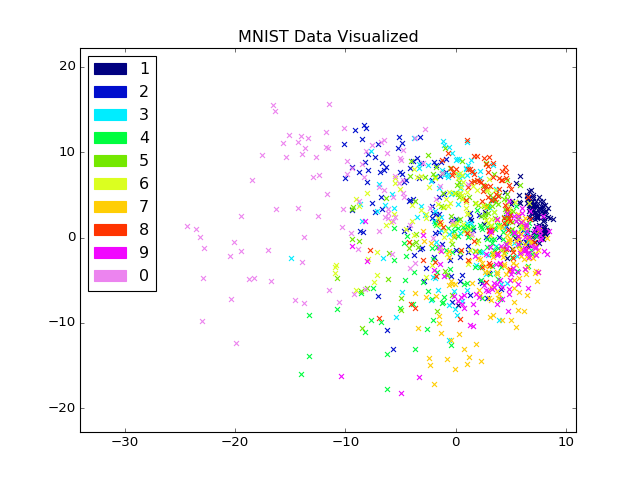

In [45]:
num_to_visualize=1000
plot_PCA2D(classes=classes, Y=Y[:num_to_visualize], y=y[:num_to_visualize], cmap_name='gist_ncar', marker='x')
plt.title("MNIST Data Visualized")

In [46]:
plt.close()

# Pokemon Dataset

In [39]:
pokemon_data = pd.read_csv(filepath_or_buffer='Pokemon.csv')
print("Dataframe: \n", pokemon_data.head())

# These are the observations we will be using
X = pokemon_data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']].values
X = np.matrix(X, dtype=float) # because Legendary is a bool and we want it to be an int
print("X: \n", X)

type1 = pokemon_data['Type 1'].unique()
type2 = pokemon_data['Type 2'].unique()

print("Type 1: \n", type1)
print("Type 2: \n", type2)

y1 = pokemon_data['Type 1']
y2 = pokemon_data['Type 2']

Dataframe: 
    #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation Legendary  
0       65       65     45           1     False  
1       80       80     60           1     False  
2      100      100     80           1     False  
3      122      120     80           1     False  
4       60       50     65           1     False  
X: 
 [[  45.   49.   49. ...,   45.    1.    0.]
 [  60.   62.   63. ...,   60.    1.    0.]
 [  80.   82.   83. ...,   80.    1.    0.]
 ..., 
 [  80.  110.   60. ...,   70.    6.    1.]
 [  80.  160.   60. ...,   80.    6.    1.]
 [  

<IPython.core.display.Javascript object>


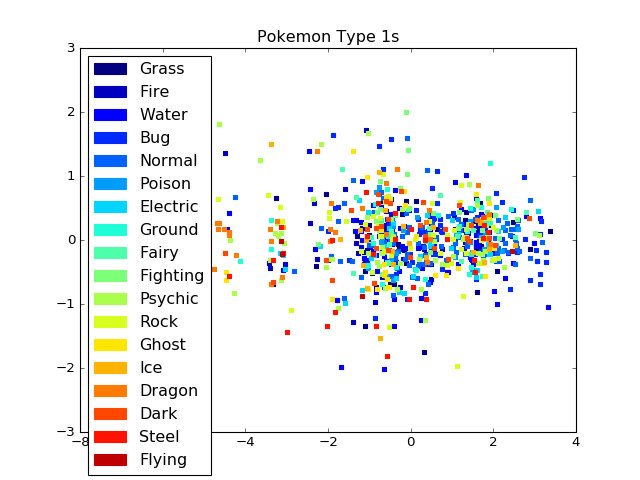

In [40]:
# We are going to use this data multiple times. Once with Type 1 Classes, Once with Type 2 Classes
Y, proj_mat = PCA(X=X, k=2, should_print=False)
plot_PCA2D(Y, y1, type1)
plt.title("Pokemon Type 1s")

<IPython.core.display.Javascript object>


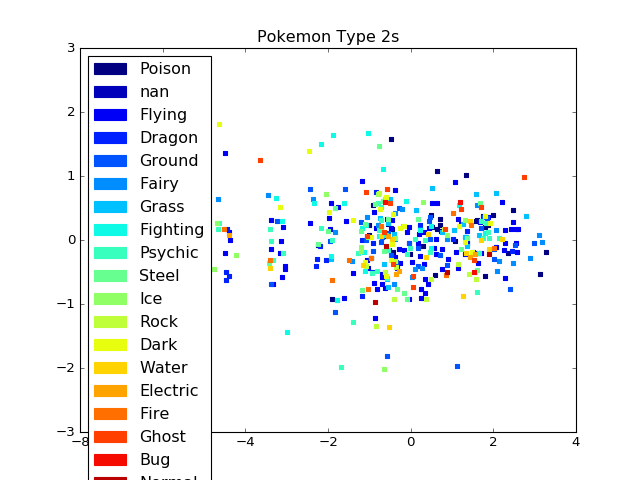

In [41]:
# This doesn't tell us much. All the data is almost evenly spread out! Lets try Type 2
plot_PCA2D(Y, y2, type2)
plt.title("Pokemon Type 2s")

In [37]:
# Not much better! Maybe we should try classifyig different generations?
X = pokemon_data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary']].values
X = np.matrix(X, dtype=float) # because Legendary is a bool and we want it to be an int
print("X: \n", X)
generations = pokemon_data['Generation'].unique()
print("Generations: \n", type1)
y_gen = pokemon_data['Generation']


X: 
 [[  45.   49.   49. ...,   65.   45.    0.]
 [  60.   62.   63. ...,   80.   60.    0.]
 [  80.   82.   83. ...,  100.   80.    0.]
 ..., 
 [  80.  110.   60. ...,  130.   70.    1.]
 [  80.  160.   60. ...,  130.   80.    1.]
 [  80.  110.  120. ...,   90.   70.    1.]]
Generations: 
 [1 2 3 4 5 6]


<IPython.core.display.Javascript object>


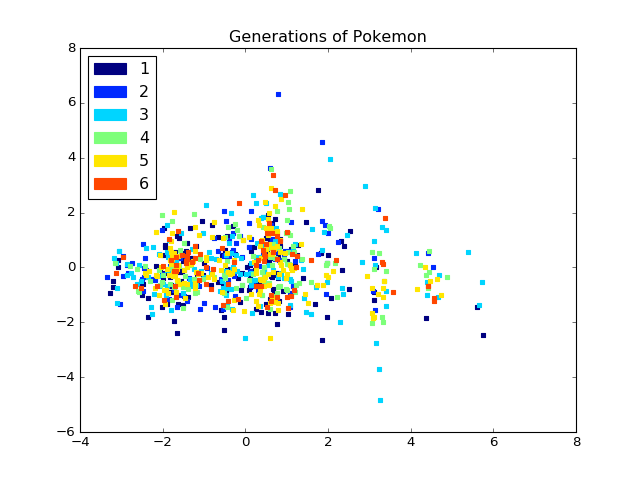

In [38]:
Y, proj_mat = PCA(X, k=2, should_print=False)
plot_PCA2D(Y, y_gen, generations)
plt.title("Generations of Pokemon")

X: 
 [[  45.   49.   49. ...,   65.   45.    1.]
 [  60.   62.   63. ...,   80.   60.    1.]
 [  80.   82.   83. ...,  100.   80.    1.]
 ..., 
 [  80.  110.   60. ...,  130.   70.    6.]
 [  80.  160.   60. ...,  130.   80.    6.]
 [  80.  110.  120. ...,   90.   70.    6.]]


<IPython.core.display.Javascript object>


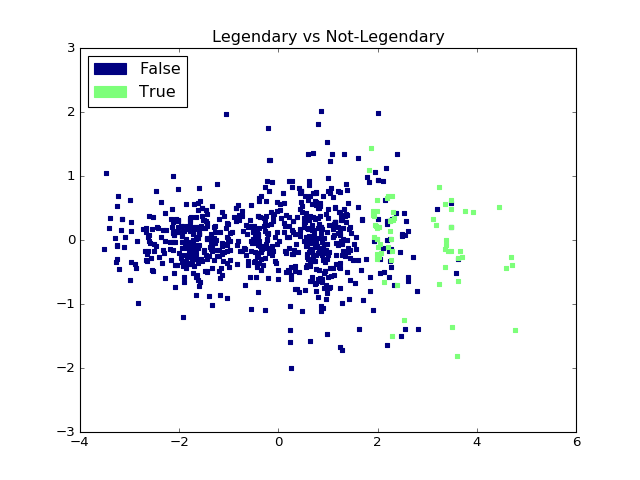

In [36]:
# Nope! still nothing intersting! Maybe Legendary vs not-legendary will work?
X = pokemon_data[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']].values
X = np.matrix(X, dtype=float) # because Legendary is a bool and we want it to be an int
print("X: \n", X)
classes = pokemon_data['Legendary'].unique()
y_leg = pokemon_data['Legendary']


Y, proj_mat = PCA(X, k=2, should_print=False)
plot_PCA2D(Y, y_leg, classes)

# YAY! Something that looks decently interesting!
# Legendaries have greater values on the pc1 axis! Now that's something your average gamer couldn't tell you! 
plt.title("Legendary vs Not-Legendary")